In [26]:
import json
import importlib
import graphing_results as g

storage_file = "test_results.json"

with open(storage_file, "r") as f:
    test_results = json.load(f)

model_prefixes = ['lichess9gb_8layer', 'random16M_8layer']  # Replace with your model prefixes
datasets_to_include = ['random100games', 'lichess13_100g_180m']  # Replace with your datasets

for model in model_prefixes:
    print(f"Evaluated checkpoints for model {model} are {test_results[model].keys()}")


Evaluated checkpoints for model lichess9gb_8layer are dict_keys(['22K', '2K', '21K', '30K', '40K', '50K', '60K', '70K', '80K', '90K', '100K', '110K', '140K', '150K', '160K', '170K', '180K', '120K', '130K'])
Evaluated checkpoints for model random16M_8layer are dict_keys(['6K', '12K', '22K', '33K', '40K', '50K', '60K', '70K', '80K', '90K', '100K'])


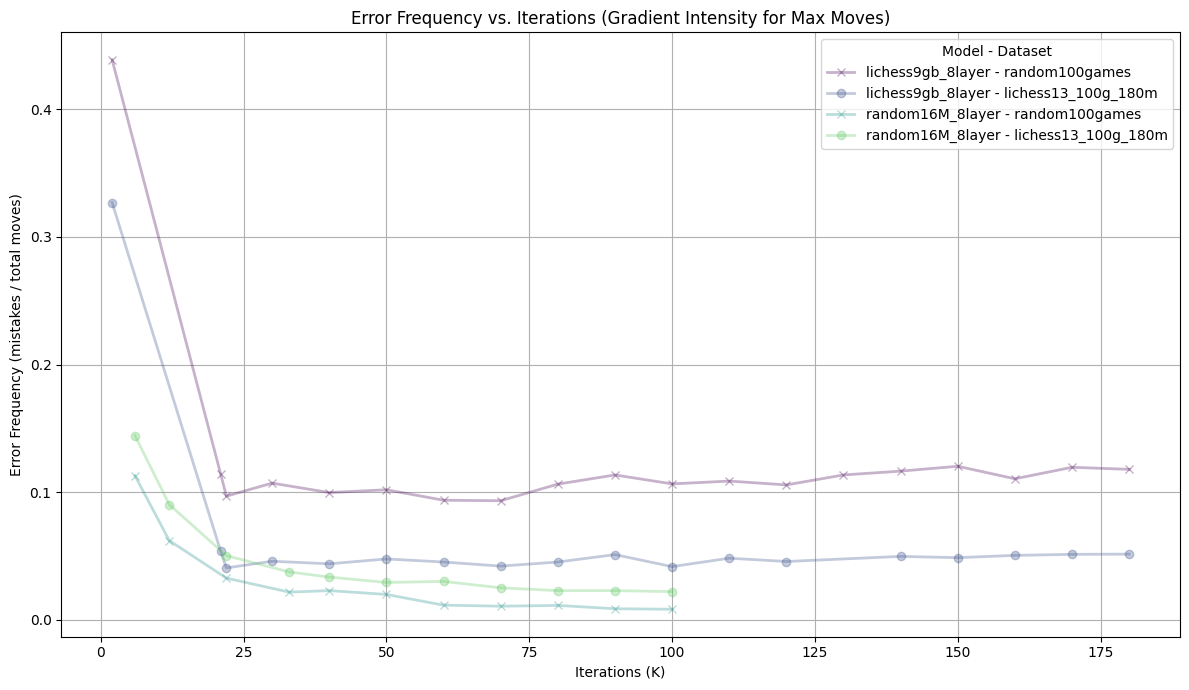

In [27]:

importlib.reload(g)

g.plot_error_frequencies(test_results,model_prefixes, datasets_to_include, [50])


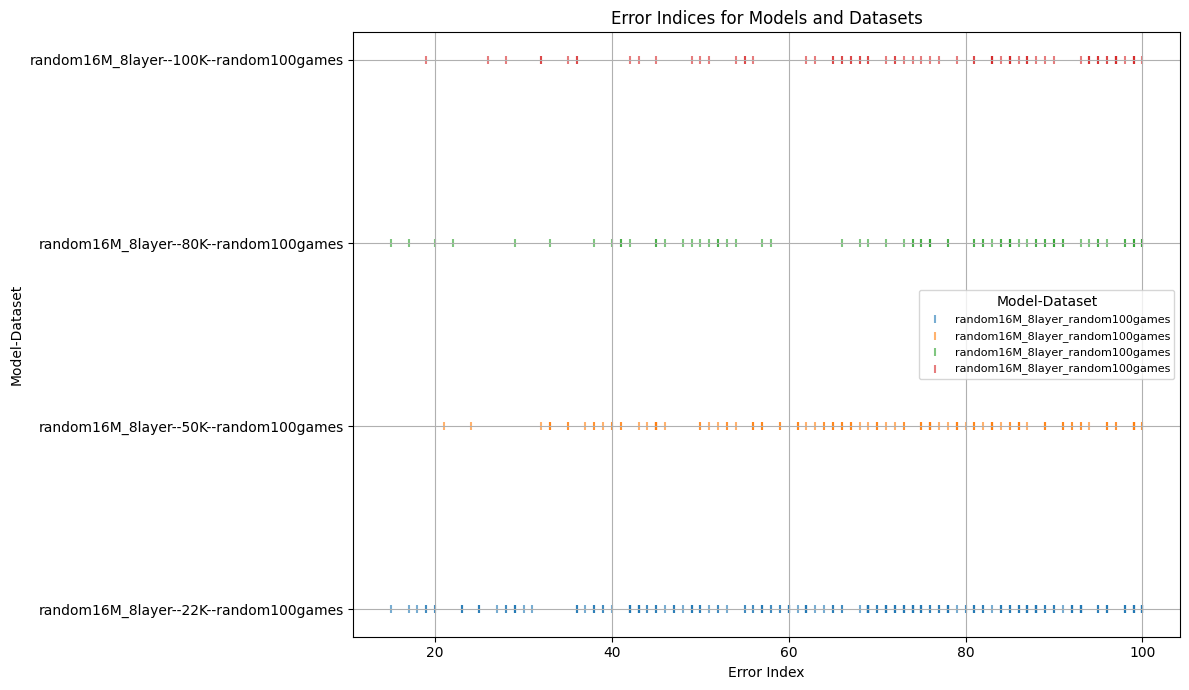

In [28]:
importlib.reload(g)

#model_names = ["random16M_8layer_50K", "random16M_8layer_100K", "lichess9gb_8layer_50K","lichess9gb_8layer_100K"]
model_names = ["random16M_8layer_22K", "random16M_8layer_50K", "random16M_8layer_80K","random16M_8layer_100K"]
datasets = ['random100games']
max_moves_considered = 100
max_games_considered = 30


g.plot_error_cloud(test_results,model_names,datasets,max_moves_considered,max_games_considered)